In [41]:
from cvrp_algorithms import SimpleAco, AcoSigmaBestAnts, AcoImprovedPheromoneUpdate, Aco2opt, Greedy
import cvrpcases as cvrp
from array import *
import math
import matplotlib.pyplot as plt
import numpy as np
import time
from matplotlib.backends.backend_pdf import PdfPages

In [30]:
 algorithm = Greedy(cvrp.load_case(r'datasets\A\A-n32-k5.vrp'))
 algorithm = SimpleAco(cvrp.load_case(r'datasets\A\A-n32-k5.vrp'), ants_count=50, max_iterations=10, alpha=100, beta=1, evaporation_rate=0.6, pheromone_amount=20, seed = 78)
 #algorithm = AcoSigmaBestAnts(cvrp.load_case(r'datasets\A\A-n32-k5.vrp'), ants_count=50, max_iterations=10, alpha=2, beta=5, evaporation_rate=0.6, pheromone_amount=20, sigma=10, seed = 78)
 #algorithm = AcoImprovedPheromoneUpdate(cvrp.load_case(r'datasets\A\A-n32-k5.vrp'), ants_count=50, max_iterations=10, alpha=2, beta=5, evaporation_rate=0.6, pheromone_amount=20, sigma=10, seed = 78)
#algorithm = Aco2opt(cvrp.load_case(r'datasets\A\A-n32-k5.vrp'), ants_count=50, max_iterations=10, alpha=2, beta=5, evaporation_rate=0.6, pheromone_amount=20, seed = 78)

solution, path = algorithm.compute(log_level=0)
print("Solution: " + str(solution))
print("Path: " + str(path))

# sprawdzenie czy poprawnie obliczono koszt rozwiązania
# sum = 0
# v1 = path[0]
# for v2 in path[1:]:
#     sum += case.graph[v1][v2]['weight']
#     v1 = v2
# print("Suma wag: "+str(sum))

Solution: 1021.4545306827588
Path: [1, 28, 25, 15, 27, 31, 17, 2, 1, 13, 8, 14, 22, 32, 20, 19, 1, 21, 6, 26, 11, 16, 30, 23, 10, 9, 1, 7, 4, 3, 24, 29, 5, 12, 1, 18, 1]


In [3]:
algorithm = SimpleAco(cvrp.load_case(r'datasets\A\A-n32-k5.vrp'), ants_count=50, max_iterations=10, alpha=2, beta=5, evaporation_rate=0.6, pheromone_amount=20, seed = 78)
solution, path = algorithm.compute(log_level=0)
print("Solution: " + str(solution))
print("Path: " + str(path))

Solution: 983.7216225346679
Path: [1, 23, 10, 16, 11, 26, 6, 21, 30, 19, 9, 27, 1, 31, 17, 13, 2, 8, 22, 1, 5, 12, 29, 24, 3, 4, 7, 15, 1, 18, 20, 32, 14, 25, 1, 28, 1]


In [4]:
algorithm = AcoSigmaBestAnts(cvrp.load_case(r'datasets\A\A-n32-k5.vrp'), ants_count=50, max_iterations=10, alpha=2, beta=5, evaporation_rate=0.6, pheromone_amount=20, sigma=10, seed = 78)
solution, path = algorithm.compute(log_level=0)
print("Solution: " + str(solution))
print("Path: " + str(path))

Solution: 920.6451355961169
Path: [1, 16, 23, 10, 29, 5, 12, 9, 19, 30, 1, 21, 6, 11, 26, 24, 4, 3, 7, 15, 27, 1, 18, 20, 32, 22, 14, 8, 1, 2, 17, 31, 25, 28, 1, 13, 1]


In [5]:
algorithm = AcoImprovedPheromoneUpdate(cvrp.load_case(r'datasets\A\A-n32-k5.vrp'), ants_count=50, max_iterations=10, alpha=2, beta=5, evaporation_rate=0.6, pheromone_amount=20, sigma=10, seed = 78)
solution, path = algorithm.compute(log_level=0)
print("Solution: " + str(solution))
print("Path: " + str(path))

Solution: 957.0329987614714
Path: [1, 19, 30, 12, 5, 29, 4, 3, 24, 7, 27, 1, 21, 6, 16, 11, 26, 10, 23, 9, 15, 1, 2, 22, 20, 18, 32, 14, 1, 28, 25, 31, 17, 13, 1, 8, 1]


In [6]:
algorithm = Aco2opt(cvrp.load_case(r'datasets\A\A-n32-k5.vrp'), ants_count=50, max_iterations=10, alpha=2, beta=5, evaporation_rate=0.6, pheromone_amount=0, seed = 78)
solution, path = algorithm.compute(log_level=0)
print("Solution: " + str(solution))
print("Path: " + str(path))

Solution: 1000.0833104524698
Path: [1, 3, 4, 24, 5, 12, 9, 29, 19, 11, 30, 1, 31, 27, 8, 17, 13, 2, 15, 6, 1, 22, 18, 20, 32, 14, 28, 1, 7, 10, 23, 16, 26, 21, 1, 25, 1]


In [11]:
print("Hipoteza 1: Jak liczba iteracji wpływa na jakość rozwiązania? - przypadek 1 - algorytm - SimpleAco")

seedCount = 10
iterationCount = 200
iterationJump = 2

cases =[
r'datasets\A\A-n32-k5.vrp',
r'datasets\A\A-n33-k5.vrp',
r'datasets\A\A-n33-k6.vrp',
r'datasets\A\A-n34-k5.vrp',
r'datasets\A\A-n36-k5.vrp',
r'datasets\A\A-n37-k5.vrp']

hyp1_1 = [[[0 for z in range(len(cases))] for x in range(seedCount)] for y in range(0,math.floor(iterationCount/iterationJump))] 

for cas in range(len(cases)):
    for it in range(1,iterationCount+1,iterationJump):
        print(it)
        for seed in range(seedCount):
            algorithm = SimpleAco(cvrp.load_case(cases[cas]), ants_count=10, max_iterations=it, alpha=2, beta=5, evaporation_rate=0.6, pheromone_amount=0, seed = seed)
            solution, path = algorithm.compute(log_level=0)
            hyp1_1[math.floor(it/iterationJump)][seed][cas] = solution

print(hyp1_1)

t
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
15
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
17
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
19
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test

In [5]:
print("Hipoteza 1: Jak liczba iteracji wpływa na jakość rozwiązania? - przypadek 1 - algorytm - AcoSigmaBestAnts")

seedCount = 10
iterationCount = 200
iterationJump = 2

cases =[
r'datasets\A\A-n32-k5.vrp',
r'datasets\A\A-n33-k5.vrp',
r'datasets\A\A-n33-k6.vrp',
r'datasets\A\A-n34-k5.vrp',
r'datasets\A\A-n36-k5.vrp',
r'datasets\A\A-n37-k5.vrp']

hyp1_2 = [[[0 for z in range(len(cases))] for x in range(seedCount)] for y in range(0,math.floor(iterationCount/iterationJump))] 

for cas in range(len(cases)):
    for it in range(1,iterationCount+1,iterationJump):
        print(it)
        for seed in range(seedCount):
            algorithm = AcoSigmaBestAnts(cvrp.load_case(cases[cas]), ants_count=10, max_iterations=it, alpha=2, beta=5, evaporation_rate=0.6, pheromone_amount=0, sigma = 1, seed = seed)
            solution, path = algorithm.compute(log_level=0)
            hyp1_2[math.floor(it/iterationJump)][seed][cas] = solution

print(hyp1_2)

]
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
17
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
19
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
test2
te

In [7]:
print("Hipoteza 1: Jak liczba iteracji wpływa na jakość rozwiązania? - przypadek 1 - algorytm - AcoImprovedPheromoneUpdate")

seedCount = 10
iterationCount = 200
iterationJump = 2

cases =[
r'datasets\A\A-n32-k5.vrp',
r'datasets\A\A-n33-k5.vrp',
r'datasets\A\A-n33-k6.vrp',
r'datasets\A\A-n34-k5.vrp',
r'datasets\A\A-n36-k5.vrp',
r'datasets\A\A-n37-k5.vrp']

hyp1_3 = [[[0 for z in range(len(cases))] for x in range(seedCount)] for y in range(0,math.floor(iterationCount/iterationJump))] 

for cas in range(len(cases)):
    for it in range(1,iterationCount+1,iterationJump):
        print(it)
        for seed in range(seedCount):
            algorithm = AcoImprovedPheromoneUpdate(cvrp.load_case(cases[cas]), ants_count=10, max_iterations=it, alpha=2, beta=5, evaporation_rate=0.6, pheromone_amount=0, sigma = 10, seed = seed)
            solution, path = algorithm.compute(log_level=0)
            hyp1_3[math.floor(it/iterationJump)][seed][cas] = solution

print(hyp1_3)

Hipoteza 1: Jak liczba iteracji wpływa na jakość rozwiązania? - przypadek 1 - algorytm - AcoImprovedPheromoneUpdate
1
3
5
7
9
11
13
15
17
19
1
3
5
7
9
11
13
15
17
19
1
3
5
7
9
11
13
15
17
19
1
3
5
7
9
11
13
15
17
19
1
3
5
7
9
11
13
15
17
19
1
3
5
7
9
11
13
15
17
19
[[[1198.40869257607, 1074.4402585962584, 1068.5371973284864, 1160.9875094078075, 1315.1161630551871, 1154.466278589702], [1159.1423674093771, 1002.9753750008464, 1105.2466047354092, 1264.4228303938467, 1259.1121072924022, 1206.6541608439597], [1203.0176511333298, 1001.0186085637918, 1033.4042383764038, 1148.5475142034807, 1301.4931722629276, 1088.856529958396], [1127.2597857847866, 1042.0409171783028, 1139.3463878392633, 1080.0220073541864, 1343.1805087059136, 1149.4080662620847], [1073.0015548818226, 1019.3337012685269, 1015.1416702350549, 1148.5113052104768, 1228.183766259534, 1063.4216592092698]], [[1022.7419989686701, 945.1282362075698, 1032.5737868788897, 1059.7422100744138, 1108.4425907928246, 1059.7465965259616], [109

In [8]:
print("Hipoteza 1: Jak liczba iteracji wpływa na jakość rozwiązania? - przypadek 1 - algorytm - Aco2opt")

seedCount = 10
iterationCount = 200
iterationJump = 2

cases =[
r'datasets\A\A-n32-k5.vrp',
r'datasets\A\A-n33-k5.vrp',
r'datasets\A\A-n33-k6.vrp',
r'datasets\A\A-n34-k5.vrp',
r'datasets\A\A-n36-k5.vrp',
r'datasets\A\A-n37-k5.vrp']

hyp1_4 = [[[0 for z in range(len(cases))] for x in range(seedCount)] for y in range(0,math.floor(iterationCount/iterationJump))] 

for cas in range(len(cases)):
    for it in range(1,iterationCount+1,iterationJump):
        print(it)
        for seed in range(seedCount):
            algorithm = Aco2opt(cvrp.load_case(cases[cas]), ants_count=10, max_iterations=it, alpha=2, beta=5, evaporation_rate=0.6, pheromone_amount=0, seed = seed)
            solution, path = algorithm.compute(log_level=0)
            hyp1_4[math.floor(it/iterationJump)][seed][cas] = solution

print(hyp1_4)

st
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
15
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
17
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
19
test
test
test
test
test
test
test
test
test
test
test
test
test
test
tes

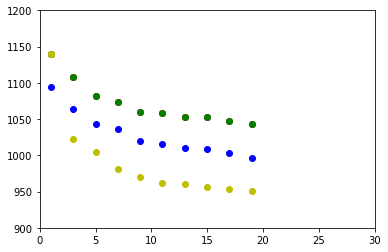

In [12]:
sum = np.zeros(len(hyp1_1))
mean1 = np.zeros(len(hyp1_1))
for iter in range (len(hyp1_1)):
    count = 0
    for row in range (len(hyp1_1[0])):
        for col in range(len(hyp1_1[0][0])):
            sum[iter] = sum[iter] + hyp1_1[iter][row][col]
            count = count + 1
    mean1[iter] = sum[iter]/count

sum = np.zeros(len(hyp1_1))
mean2 = np.zeros(len(hyp1_1))
for iter in range (len(hyp1_1)):
    count = 0
    for row in range (len(hyp1_1[0])):
        for col in range(len(hyp1_1[0][0])):
            sum[iter] = sum[iter] + hyp1_2[iter][row][col]
            count = count + 1
    mean2[iter] = sum[iter]/count

sum = np.zeros(len(hyp1_1))
mean3 = np.zeros(len(hyp1_1))
for iter in range (len(hyp1_1)):
    count = 0
    for row in range (len(hyp1_1[0])):
        for col in range(len(hyp1_1[0][0])):
            sum[iter] = sum[iter] + hyp1_3[iter][row][col]
            count = count + 1
    mean3[iter] = sum[iter]/count

sum = np.zeros(len(hyp1_1))
mean4 = np.zeros(len(hyp1_1))
for iter in range (len(hyp1_1)):
    count = 0
    for row in range (len(hyp1_1[0])):
        for col in range(len(hyp1_1[0][0])):
            sum[iter] = sum[iter] + hyp1_4[iter][row][col]
            count = count + 1
    mean4[iter] = sum[iter]/count

plt.plot(range(1,200,2), mean1, 'ro',range(1,200,2), mean2, 'go',range(1,200,2), mean3, 'yo',range(1,200,2), mean4, 'bo')
plt.axis([0, 200, 900, 1200])
plt.show()

In [32]:
print('hipoteza 2 - Jaki jest najlepszy stosunek alfa do beta - SimpleAco')

seedCount = 10

#cases =[
#r'datasets\A\A-n32-k5.vrp',
#r'datasets\A\A-n33-k5.vrp',
#r'datasets\A\A-n33-k6.vrp',
#r'datasets\A\A-n34-k5.vrp',
#r'datasets\A\A-n36-k5.vrp',
#r'datasets\A\A-n37-k5.vrp']

cases =[
r'datasets\A\A-n32-k5.vrp']

hyp2_1 = [[[0 for z in range(len(cases))] for x in range(seedCount)] for y in range(0,101,1)] 

for cas in range(len(cases)):
    for it in range(0,101,1):
        print(it)
        for seed in range(seedCount):
            algorithm = SimpleAco(cvrp.load_case(cases[cas]), ants_count=50, max_iterations=10, alpha=it/100, beta=(100-it)/100, evaporation_rate=0.6, pheromone_amount=0, seed = seed)
            solution, path = algorithm.compute(log_level=0)
            hyp2_1[it][seed][cas] = solution

print(hyp2_1)

99692710922], [1723.5273525393668], [1672.6422685957587]], [[1594.3336269891722], [1626.4050244528762], [1614.8930100348612], [1669.442943697856], [1622.5352973989495], [1577.2462427358248], [1590.6381292498725], [1571.499692710922], [1723.5273525393668], [1672.6422685957587]], [[1594.3336269891722], [1626.4050244528762], [1614.8930100348612], [1669.442943697856], [1622.5352973989495], [1577.2462427358248], [1585.0456088388355], [1571.499692710922], [1723.5273525393668], [1672.6422685957587]], [[1594.3336269891722], [1622.5006096857248], [1557.708374082834], [1624.9840673862868], [1622.5352973989495], [1577.2462427358248], [1585.0456088388355], [1569.9266991361646], [1723.5273525393668], [1672.6422685957587]], [[1557.2462033470156], [1622.5006096857248], [1557.708374082834], [1624.9840673862868], [1622.5352973989495], [1577.2462427358248], [1585.0456088388355], [1569.9266991361646], [1673.0214875001607], [1672.6422685957587]], [[1557.2462033470156], [1622.5006096857248], [1557.70837408

In [ ]:
print('hipoteza 2 - Jaki jest najlepszy stosunek alfa do beta - AcoSigmaBestAnts')

seedCount = 10

cases =[
r'datasets\A\A-n32-k5.vrp',
r'datasets\A\A-n33-k5.vrp',
r'datasets\A\A-n33-k6.vrp',
r'datasets\A\A-n34-k5.vrp',
r'datasets\A\A-n36-k5.vrp',
r'datasets\A\A-n37-k5.vrp']

hyp2_2 = [[[0 for z in range(len(cases))] for x in range(seedCount)] for y in range(0,101,1)] 

for cas in range(len(cases)):
    for it in range(0,101,1):
        print(it)
        for seed in range(seedCount):
            AcoSigmaBestAnts(cvrp.load_case(cases[cas]), ants_count=10, max_iterations=it, alpha=it/100, beta=(100-it)/100, evaporation_rate=0.6, pheromone_amount=0, sigma = 5, seed = seed)
            solution, path = algorithm.compute(log_level=0)
            hyp2_2[it][seed][cas] = solution

print(hyp2_2)

In [ ]:
print('hipoteza 2 - Jaki jest najlepszy stosunek alfa do beta - AcoImprovedPheromoneUpdate')

seedCount = 10

cases =[
r'datasets\A\A-n32-k5.vrp',
r'datasets\A\A-n33-k5.vrp',
r'datasets\A\A-n33-k6.vrp',
r'datasets\A\A-n34-k5.vrp',
r'datasets\A\A-n36-k5.vrp',
r'datasets\A\A-n37-k5.vrp']

hyp2_3 = [[[0 for z in range(len(cases))] for x in range(seedCount)] for y in range(0,101,1)] 

for cas in range(len(cases)):
    for it in range(0,101,1):
        print(it)
        for seed in range(seedCount):
            algorithm = AcoImprovedPheromoneUpdate(cvrp.load_case(cases[cas]), ants_count=10, max_iterations=it, alpha=it/100, beta=(100-it)/100, evaporation_rate=0.6, pheromone_amount=0, sigma = 10, seed = seed)
            solution, path = algorithm.compute(log_level=0)
            hyp2_3[it][seed][cas] = solution

print(hyp2_3)

In [ ]:
print('hipoteza 2 - Jaki jest najlepszy stosunek alfa do beta - Aco2opt')

seedCount = 10

cases =[
r'datasets\A\A-n32-k5.vrp',
r'datasets\A\A-n33-k5.vrp',
r'datasets\A\A-n33-k6.vrp',
r'datasets\A\A-n34-k5.vrp',
r'datasets\A\A-n36-k5.vrp',
r'datasets\A\A-n37-k5.vrp']

hyp2_4 = [[[0 for z in range(len(cases))] for x in range(seedCount)] for y in range(0,101,1)] 

for cas in range(len(cases)):
    for it in range(0,101,1):
        print(it)
        for seed in range(seedCount):
            algorithm = Aco2opt(cvrp.load_case(cases[cas]), ants_count=10, max_iterations=10, alpha=it/100, beta=(100-it)/100, evaporation_rate=0.6, pheromone_amount=0, seed = seed)
            solution, path = algorithm.compute(log_level=0)
            hyp2_4[it][seed][cas] = solution

print(hyp2_4)

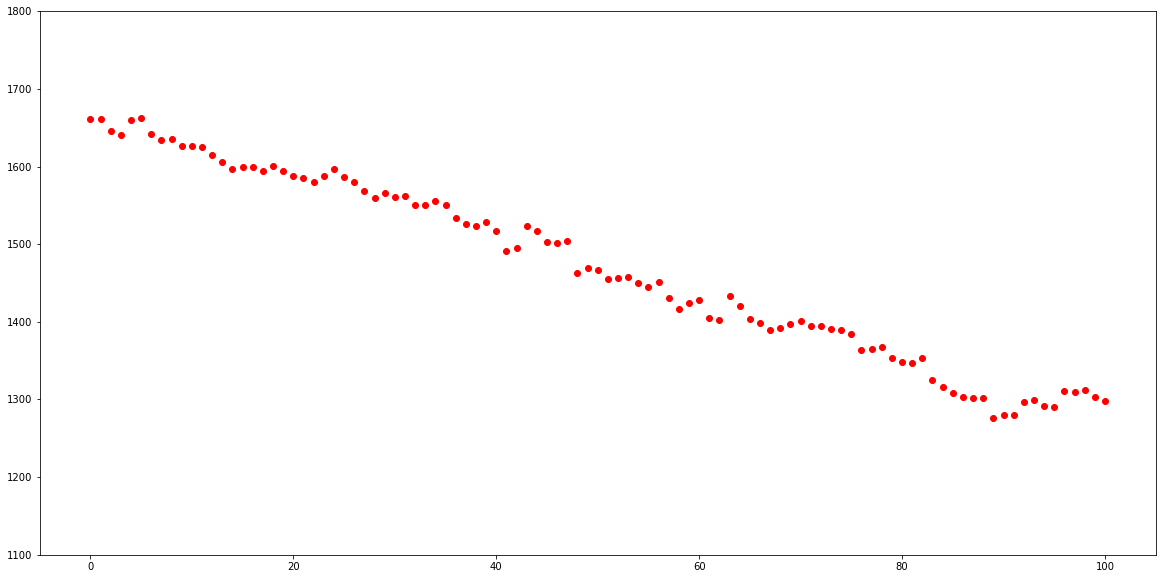

In [40]:
sum = np.zeros(len(hyp2_1))
mean2_1 = np.zeros(len(hyp2_1))
for iter in range (len(hyp2_1)):
    count = 0
    for row in range (len(hyp2_1[0])):
        for col in range(len(hyp2_1[0][0])):
            sum[iter] = sum[iter] + hyp2_1[iter][row][col]
            count = count + 1
    mean2_1[iter] = sum[iter]/count

#sum = np.zeros(len(hyp2_1))
#mean2_1 = np.zeros(len(hyp2_1))
#for iter in range (len(hyp2_1)):
#    count = 0
#    for row in range (len(hyp2_1[0])):
#        for col in range(len(hyp2_1[0][0])):
#            sum[iter] = sum[iter] + hyp2_1[iter][row][col]
#            count = count + 1
#    mean2_2[iter] = sum[iter]/count

#sum = np.zeros(len(hyp2_1))
#mean2_1 = np.zeros(len(hyp2_1))
#for iter in range (len(hyp2_1)):
#    count = 0
#    for row in range (len(hyp2_1[0])):
#        for col in range(len(hyp2_1[0][0])):
#            sum[iter] = sum[iter] + hyp2_1[iter][row][col]
#            count = count + 1
#    mean2_3[iter] = sum[iter]/count

#sum = np.zeros(len(hyp2_1))
#mean2_1 = np.zeros(len(hyp2_1))
#for iter in range (len(hyp2_1)):
#    count = 0
#    for row in range (len(hyp2_1[0])):
#        for col in range(len(hyp2_1[0][0])):
#            sum[iter] = sum[iter] + hyp2_1[iter][row][col]
#            count = count + 1
#    mean2_4[iter] = sum[iter]/count
plt.figure(figsize=(20,10))
plt.plot(range(0,101,1), mean2_1, 'ro')#,range(1,200,2), mean2_2, 'go',range(1,200,2), mean2_3, 'yo',range(1,200,2), mean2_4, 'bo')
plt.axis([-5, 105, 1100, 1800])
plt.show()

In [25]:
print(mean2_1)

[1787.13304325 1787.13304325 1736.69170102 1733.37402069 1751.27805624
 1742.80718008 1713.3365781  1717.59656439 1717.59656439 1696.44758312
 1691.76639634 1690.79805482 1712.33915208 1703.86872081 1693.60872999
 1715.30298643 1708.50482478 1730.46157177 1697.62229431 1701.10692131
 1685.27393679 1697.39396249 1690.94493964 1682.93176002 1681.85174866
 1635.25189475 1624.59276203 1623.07329313 1604.92987372 1620.04445712
 1633.28223377 1641.06623582 1631.0913202  1631.0913202  1628.16252136
 1633.04764311 1629.4279551  1639.97174376 1637.58320861 1617.27496685
 1606.2542769  1598.22470864 1583.39499858 1597.71927074 1586.59245921
 1558.78449922 1557.94209564 1557.14690333 1557.13163681 1548.42215187
 1543.50455718 1540.83973044 1555.78044093 1552.51143251 1546.12856462
 1519.68638719 1519.40338622 1501.53457092 1498.67421184 1511.35922895
 1490.94740971 1489.45585819 1490.85521755 1491.78775932 1481.68742153
 1474.54529358 1476.07193897 1441.63513494 1454.50161049 1443.41615334
 1435.

In [34]:
import time
start = time.time()
print("hello")
end = time.time()
print(end - start)

hello
0.0009739398956298828


In [51]:
with PdfPages(r'charts\test.pdf') as export_pdf:  
    plt.figure(figsize=(20,10))
    plt.plot(range(0,101,1), mean2_1, 'ro')#,range(1,200,2), mean2_2, 'go',range(1,200,2), mean2_3, 'yo',range(1,200,2), mean2_4, 'bo')
    plt.axis([-5, 105, 1100, 1800])

    export_pdf.savefig()
    plt.close()

In [79]:
text_file = open(r'results\test.txt', "w+")
n = text_file.write(listToString('testee', mean2_1))
text_file.close()

In [78]:
def listToString(firstLine, list):  
    str1 = firstLine + "\n"    
    for ele in list:  
        str1 += str(ele)+'\n' 
    str1 = str1[:-2] 
    return str1  